In [23]:
import numpy as np
import scipy as scp
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy.stats import probplot

Lets simulate some brownian motion paths. we know that XT is normally distributed with mean uT and variance (sigma**2)*T

In [7]:
mu =0.1 #drift
sigma = 0.2 #volatility or difussion coefficient
np.random.seed(42)
steps =1000 #no.of time steps
paths = 4000 # no.of paths to simulate
t = 100
T_vec, dt = np.linspace(0, t, steps, retstep=True)

start = np.zeros((paths,1))
increments = ss.norm.rvs(loc=mu * dt, scale=np.sqrt(dt) * sigma, size=(paths, steps - 1))
st = np.concatenate((start,increments),axis=1).cumsum(1)

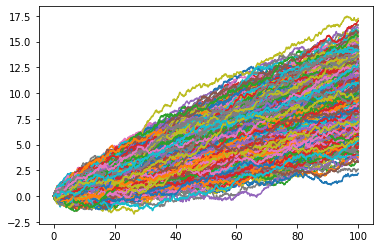

In [8]:
plt.plot(T_vec,st.T)
plt.show()

computed the mean of final positions at time T and also their standard deviation

In [9]:
st_price = st[:,-1]
print("mean of final price is {:.4f}".format(st_price.mean()))

mean of final price is 9.9827


In [10]:
print("Standard Deviation of final price at time T: {:.4f}".format(st_price.std(ddof=1)))

Standard Deviation of final price at time T: 1.9964


In [11]:
print("confidence interval of mean is:" ,ss.t.interval(0.95,paths-1,loc = st_price.mean(),scale = ss.sem(st_price)))

confidence interval of mean is: (9.920766648111108, 10.044541975623869)


In [12]:
s2 = st_price.var(ddof=1)  # unbiased sample variance
AA = s2 * (paths - 1)
print("The estimated Standard Deviation is: {:.6f}".format(st_price.std(ddof=1)))
print(
    "The confidence interval is: ",
    np.sqrt(AA / ss.chi2.ppf(0.975, df=paths - 1)),
    np.sqrt(AA / ss.chi2.ppf(0.025, df=paths - 1)),
)
print(np.sqrt(s2))

The estimated Standard Deviation is: 1.996432
The confidence interval is:  1.9536249339404514 2.041170826805831
1.9964320229965489


95% confidence interval means you still have 5% probability that a given statistic lies beyond that interval.lets simulate and see that

In [13]:
count = 0
T = 100
for n in range(100):
    np.random.seed(n)
    x = ss.norm.rvs(loc=mu*T,scale = sigma*np.sqrt(T),size = paths)
    low,high = ss.t.interval(0.95,paths-1,loc = x.mean(),scale = ss.sem(x))
    if (mu*T <low) or (mu*T>high):
        count = count+1
print(count)        

3


Here we failed 3 times out of 100

(9.982654311867488, 1.9961824533945993)


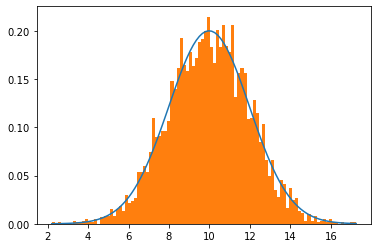

In [14]:
parameters = ss.norm.fit(st_price)
print(parameters)
x = np.linspace(st_price.min(),st_price.max(),100)
pdf = ss.norm.pdf(x,*parameters)
plt.plot(x,pdf)
plt.hist(st_price,density = True,bins=100)
plt.show()

Hypothesis testing for normally distributed data.where the null hypothesis is that the data are normally distributed and these returns a p-statsistic

In [15]:
ss.shapiro(st_price)

ShapiroResult(statistic=0.9995083324106121, pvalue=0.4099786155018912)

As we can see above that the p-value is gretaer than 0.05 so we cant reject the null hypothesis under 95% confidence level

In [16]:
ss.jarque_bera(st_price)

SignificanceResult(statistic=1.8821352125475082, pvalue=0.39021102116710205)

Lets see a comparison of quantiles of normal distribution and our data using a probability plot

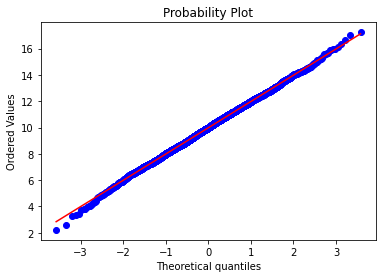

In [17]:
probplot(st_price, plot=plt)
plt.show()

Lets simulate some geometriic brownian motion paths 

In [18]:
np.random.seed(42)
mu =0.1
sigma = 0.2
T =10
N = 10000
S0 =1
W = ss.norm.rvs(loc=(mu - 0.5 * sigma**2) * T, scale=np.sqrt(T) * sigma, size=N)
S_T = S0 * np.exp(W)

Log normal distribution

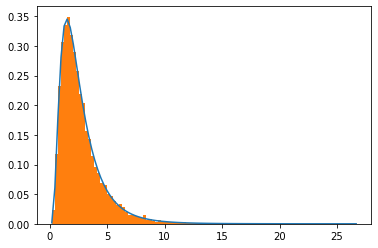

In [19]:
params = ss.lognorm.fit(S_T)
x  = np.linspace(S_T.min(),S_T.max(),100)
pdf = ss.lognorm.pdf(x,*params)
plt.plot(x,pdf)
plt.hist(S_T,density = True, bins = 100)
plt.show()

In [20]:
stdr = np.std(np.log(S_T),ddof = 0)/ np.sqrt(T)
print(stdr)
drift = (np.mean(np.log(S_T))/T)+0.5*sigma**2
print(drift.round(6))

0.20068244122599752
0.099865


In [21]:
np.random.seed(42)
paths = 10 #no.of paths
steps = 1000 #timesteps
T =10
dt = T/1000
zeros = np.zeros((paths,1))
inf = ss.norm.rvs((mu - 0.5 * sigma**2) * dt, np.sqrt(dt) * sigma, (paths,steps-1))
final = np.concatenate((zeros,inf),axis=1).cumsum(1)

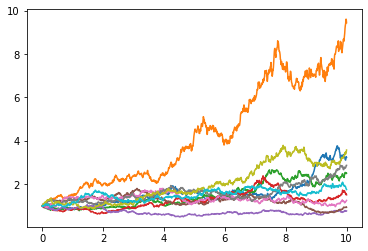

In [22]:
x = np.linspace(0,10,1000)
stt = np.exp(final)
plt.plot(x,stt.T)
plt.show()